In [13]:
import os
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from scipy.ndimage import gaussian_filter, convolve

color_map = 'gray'
gauss_sigma = [0, 0.75, 1.5, 1.8, 3,8,12]
thresholds = [0.005,0.05]

In [14]:
def apply_laplacian(images, *args):
    def singleImage(img):
        img = gaussian_filter(img, sigma=gauss_sigma[0])
        img = convolve(img, kernel)
        img = np.where(img >= np.max(img) * thresholds[0], 0, 1)
        return img
    def multiImage(img):
        imgs = [gaussian_filter(img, sigma=sigma) for sigma in args[0]]
        imgs = [convolve(img, kernel) for img in imgs]
        imgs = [np.where(img >= np.max(img) * th, 0, np.max(img)) for img in imgs for th in args[1]]
        return imgs

    num_imgs = len(images)
    output = list()
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    for i, image in enumerate(images):
        if len(args)==2: output = output + list(multiImage(image))
        else:            output = output + list(singleImage(image))
        print(int(i/num_imgs*100),"%", end="\r")
    print("100% complete")
    return output

def getDirImages(directory):
    images = list()
    for root, _, files in os.walk(directory):
        for file in files:
            path = os.path.join(root, file)
            if os.path.isfile(path):
                image = PIL.Image.open(path).convert('RGB')
                image = color.rgb2gray(image)
                images.append(image)
    return images

def display_images(image_dict):
    cols, rows = len(next(iter(image_dict.values()))), len(image_dict.keys())
    fig = plt.figure(figsize=(cols*2.5,2.5*rows*1.05))

    i = 1
    for key in image_dict:
        for img in image_dict[key]:
            fig.add_subplot(rows,cols, i)
            plt.imshow(img, cmap=color_map)
            i += 1

    # The below does not do any logic,
    # it is simply labelling the rows/cols for easier understanding.
    # There is no need to try to understand this stuff. It looks pretty bad...
    for e, ax in enumerate(fig.get_axes()):
        ax.set_axis_off()
        if e == e % cols:
            ax.annotate(str(int((100/cols)*e))+"%",
                xy=(0.5, 1),
                xytext=(0, 2.5),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline")
        if e%cols==0:
            h = "gauss:" + str(list(image_dict.keys())[int(e/cols)][1:])
            ax.annotate(h,
                xy=(0, 0),
                xytext=(0, 0),
                textcoords="offset points",
                ha="right",
                va="top",
                rotation= 90
            )
    plt.tight_layout()
    plt.show()

def display_image_list(images, gauss_sigmas, thresholds ):
    rows,cols = len(gauss_sigmas), len(thresholds)
    fig = plt.figure(figsize=(cols*2.5,2.5*rows*1.05), dpi=800)

    print(enumerate(images,start=1))
    for i, img in enumerate(images,start=1):
        fig.add_subplot(rows,cols,i)
        plt.imshow(img, cmap=color_map)

    # The below does not do any logic,
    # it is simply labelling the rows/cols for easier understanding.
    # There is no need to try to understand this stuff. It looks pretty bad...
    for e, ax in enumerate(fig.get_axes()):
        ax.set_axis_off()
        if e == e % cols:
            ax.annotate(str(int((100/cols)*e))+"%",
                xy=(0.5, 1),
                xytext=(0, 2.5),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline")
        if e%cols==0:
            h = "gauss:" + str((gauss_sigmas)[int(e/cols)])
            ax.annotate(h,
                xy=(0, 0),
                xytext=(0, 0),
                textcoords="offset points",
                ha="right",
                va="top",
                rotation= 90
            )
    plt.tight_layout()
    plt.show()

In [15]:
root = 'C:\\Users\\lukas\\OneDrive\\Desktop\\Programming\\PycharmProjects\\EdgeDetectionPaper\\'
fingerprints1 = root + 'images\\fingerprints\\DB1_B'
test = root + 'images\\test'

image_list = getDirImages(fingerprints1)

image_list = apply_laplacian(image_list, gauss_sigma, thresholds)

100% complete


ValueError: num must be an integer with 1 <= num <= 14, not 15

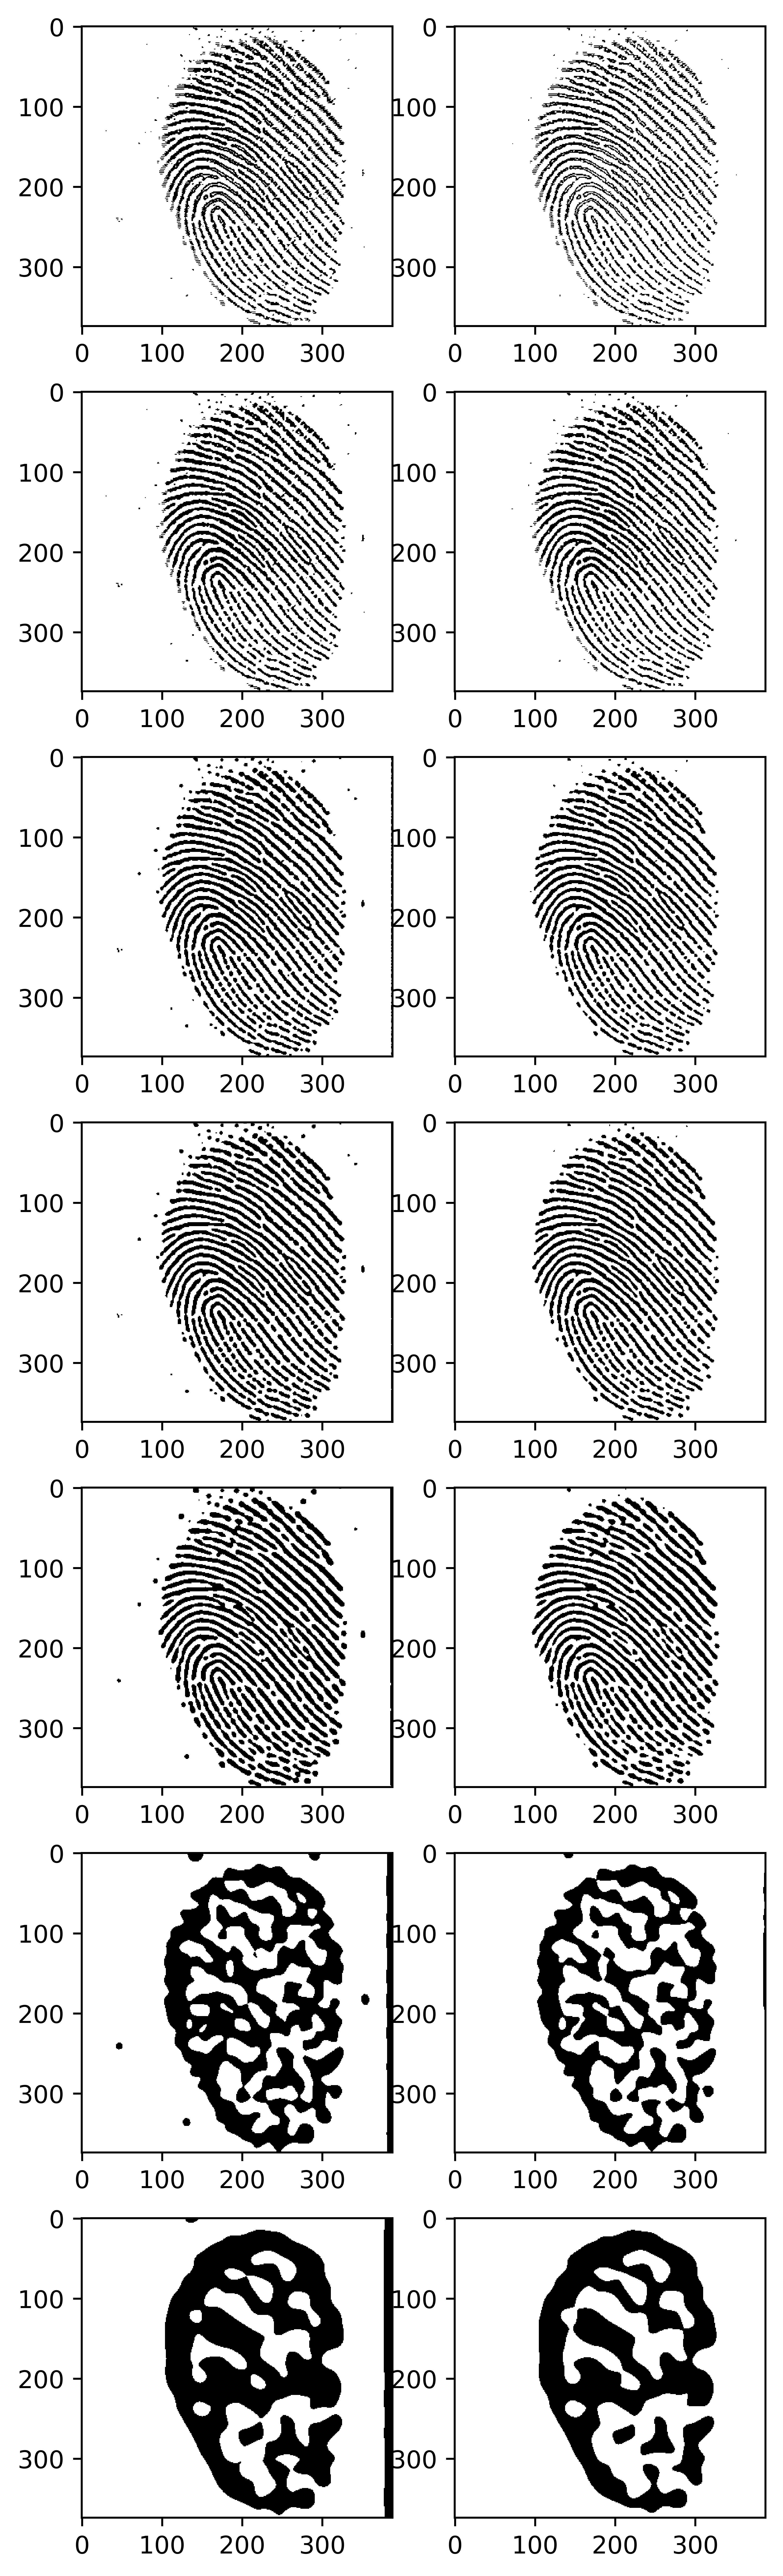

In [16]:
display_image_list(image_list, gauss_sigma, thresholds)

In [ ]:
fig = plt.figure(figsize=(12,12), dpi=400)
plt.imshow( image_list[8], cmap=color_map)

plt.show()